In [1]:
# !pip install shap

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Fold 1: MAPE = 0.1534642536382477 , RMSE = 5.7245461004705795, R2 = 0.7272931608779306
Fold 2: MAPE = 0.12304400008646421 , RMSE = 3.628544397451492, R2 = 0.8030041431445377
Fold 3: MAPE = 0.12227466267280326 , RMSE = 3.6308225220195824, R2 = 0.814527924960645
Fold 4: MAPE = 0.0933440973438404 , RMSE = 2.9428754530721024, R2 = 0.8850534497821412
Fold 5: MAPE = 0.11429039100344986 , RMSE = 2.7026136863225703, R2 = 0.9145176194131955
Average MAPE: 0.12128348094896109
Average RMSE: 3.725880431867265
Average R2: 0.8288792596356901
Feature Importance: [0.02082708 0.00075218 0.00720367 0.012443   0.05348959 0.32549885
 0.01221956 0.07747895 0.01209213 0.05392224 0.0445227  0.00847217
 0.3710779 ]


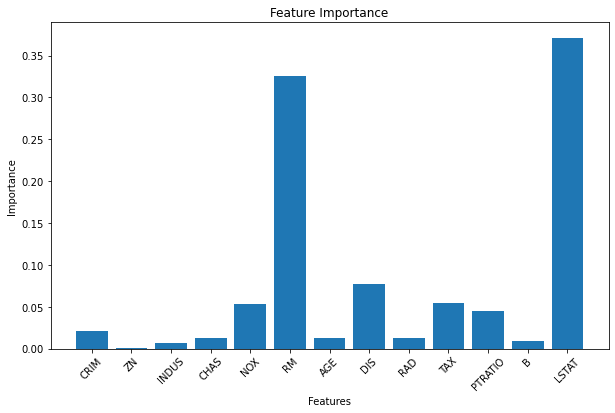

[12:36:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


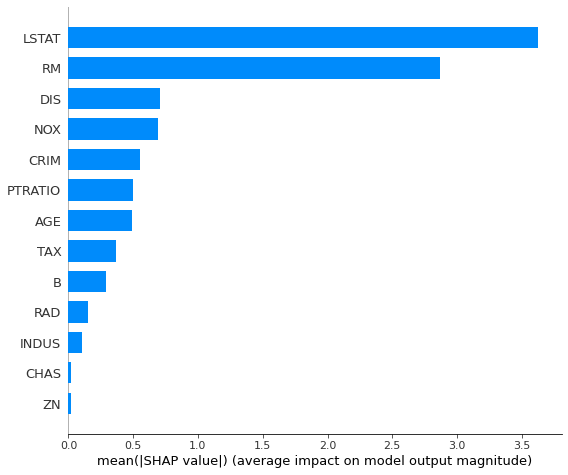

[12:36:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


CRIM


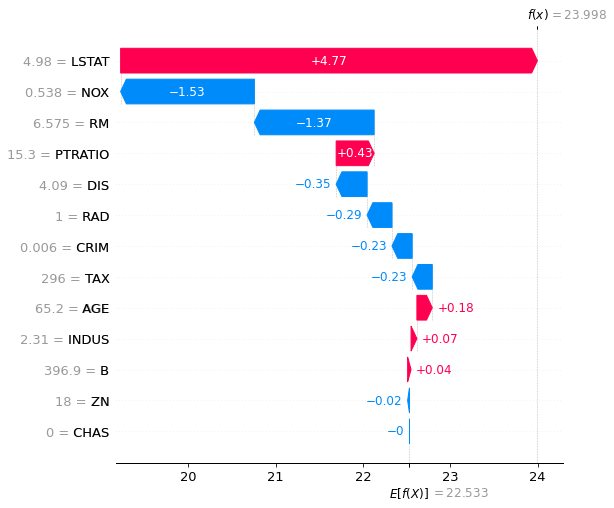

ZN


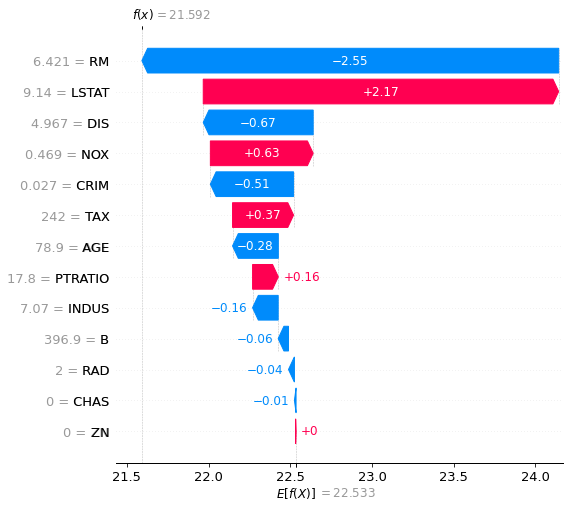

INDUS


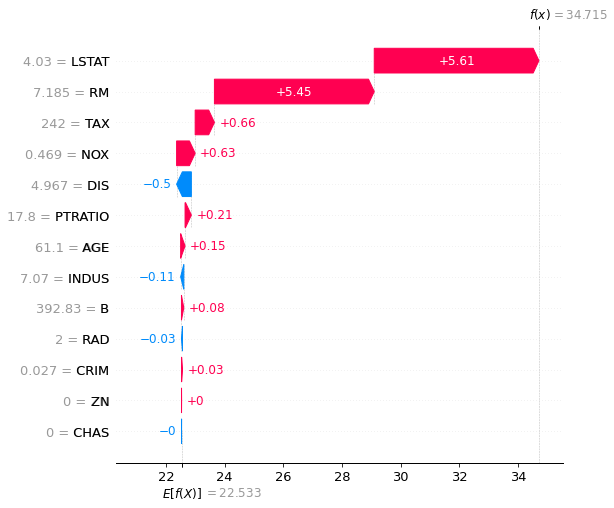

CHAS


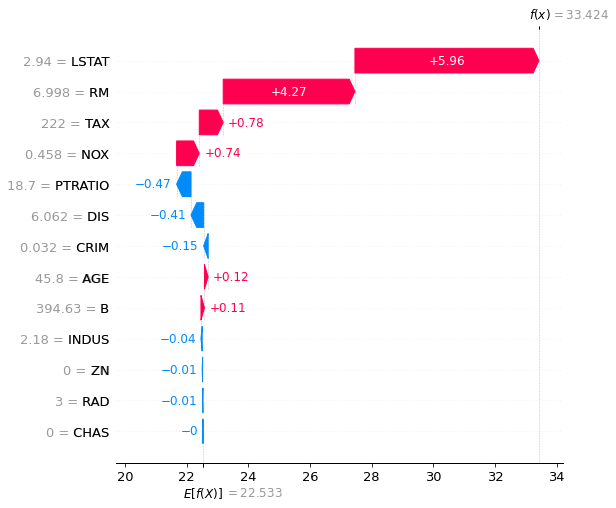

NOX


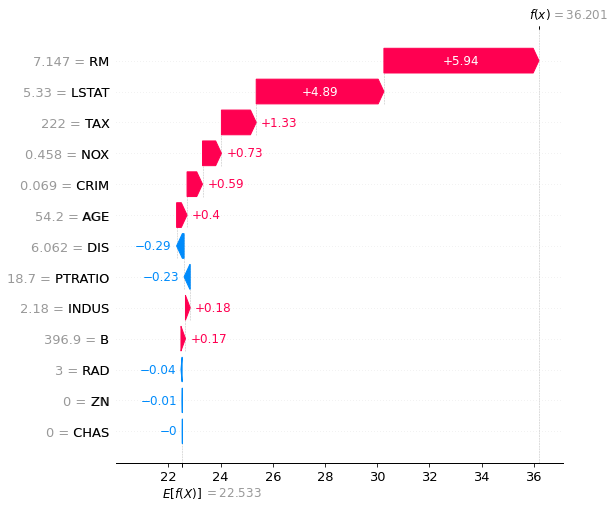

RM


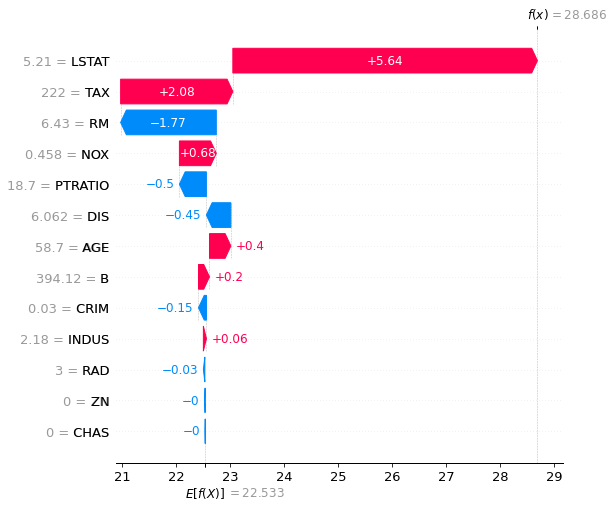

AGE


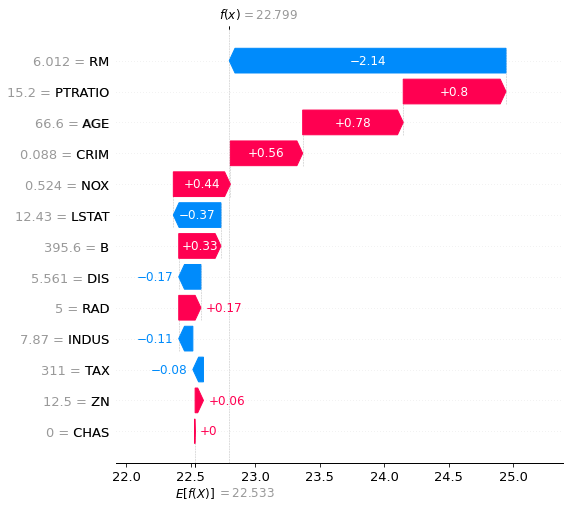

DIS


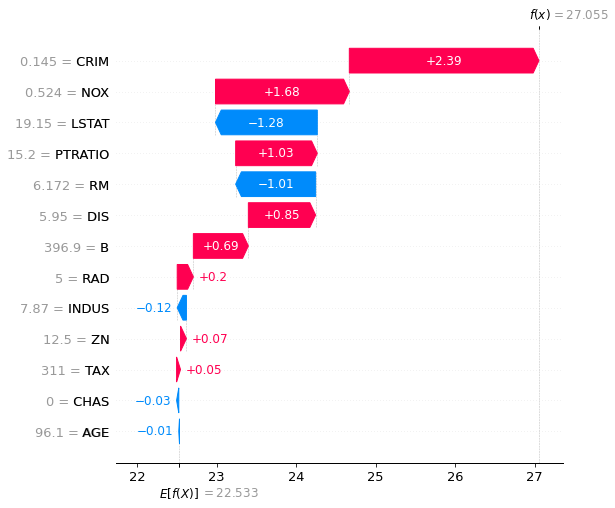

RAD


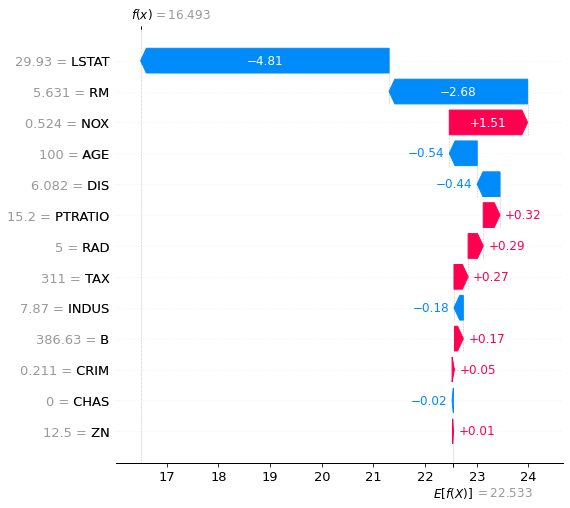

TAX


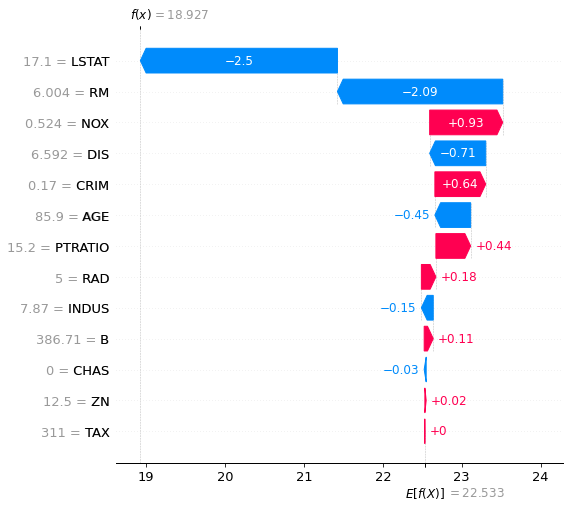

PTRATIO


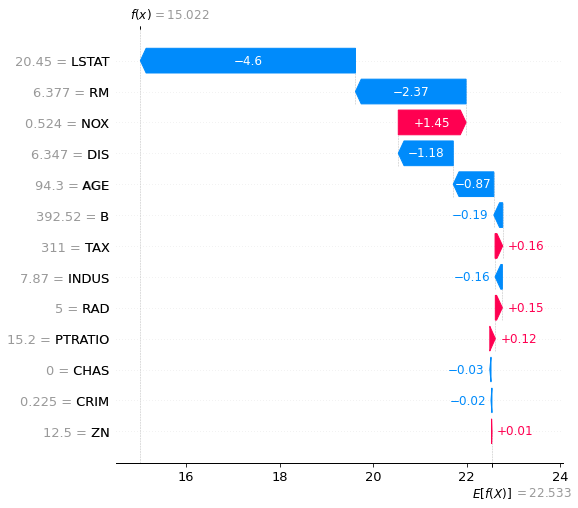

B


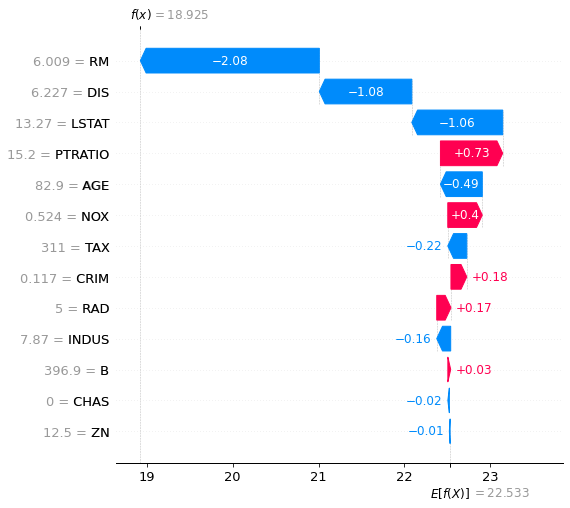

LSTAT


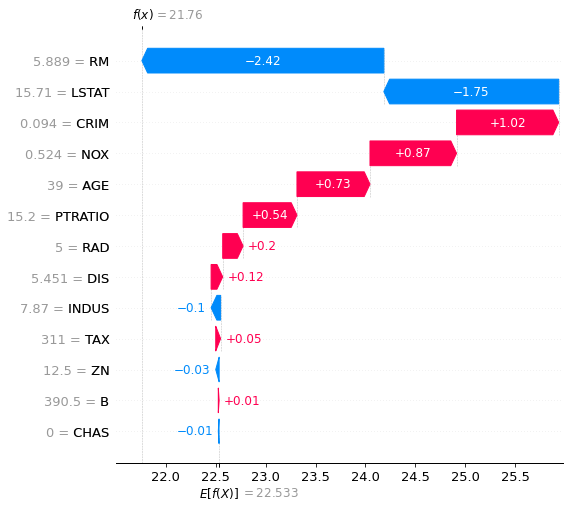

MEDV


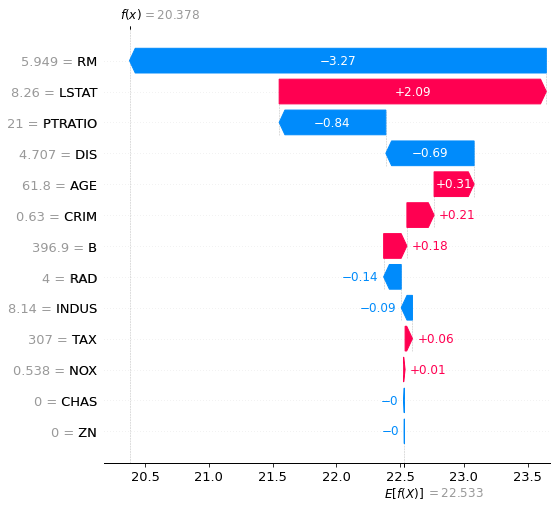

IndexError: list index out of range

In [2]:
import shap
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load Boston Housing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.xls', header=None, delimiter=r"\s+", names=column_names)
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Initialize XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

mape_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    predictions = model.predict(X_test)
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_test-predictions)/y_test))
    mape_scores.append(mape)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)
    
    # Calculate R2
    r2 = r2_score(y_test, predictions)
    r2_scores.append(r2)

# Output each fold's performance
for i in range(5):
    print(f"Fold {i+1}: MAPE = {mape_scores[i]} , RMSE = {rmse_scores[i]}, R2 = {r2_scores[i]}")

# Output the average performance for 5 folds
print(f"Average MAPE: {np.mean(mape_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R2: {np.mean(r2_scores)}")

# Calculate feature importance
model.fit(X, y)
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

model = XGBRegressor().fit(X, y)
explainer = shap.Explainer(model)
shap_values = explainer(X)
for i in range(len(shap_values)):    
    print(f'{column_names[i]}')
    shap.plots.waterfall(shap_values[i],max_display=20)

shap.summary_plot(shap_values, X)

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load Boston Housing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.xls', header=None, delimiter=r"\s+", names=column_names)
data = data.drop(columns=['PTRATIO'])
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Initialize XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

mape_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    predictions = model.predict(X_test)
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_test-predictions)/y_test))
    mape_scores.append(mape)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)
    
    # Calculate R2
    r2 = r2_score(y_test, predictions)
    r2_scores.append(r2)

# Output each fold's performance
for i in range(5):
    print(f"Fold {i+1}: MAPE = {mape_scores[i]} , RMSE = {rmse_scores[i]}, R2 = {r2_scores[i]}")

# Output the average performance for 5 folds
print(f"Average MAPE: {np.mean(mape_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R2: {np.mean(r2_scores)}")

# Calculate feature importance
model.fit(X, y)
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()



In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load Boston Housing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.xls', header=None, delimiter=r"\s+", names=column_names)
data = data.drop(columns=["CRIM"])
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Initialize XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

mape_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    predictions = model.predict(X_test)
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_test-predictions)/y_test))
    mape_scores.append(mape)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)
    
    # Calculate R2
    r2 = r2_score(y_test, predictions)
    r2_scores.append(r2)

# Output each fold's performance
for i in range(5):
    print(f"Fold {i+1}: MAPE = {mape_scores[i]} , RMSE = {rmse_scores[i]}, R2 = {r2_scores[i]}")

# Output the average performance for 5 folds
print(f"Average MAPE: {np.mean(mape_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R2: {np.mean(r2_scores)}")

# Calculate feature importance
model.fit(X, y)
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load Boston Housing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.xls', header=None, delimiter=r"\s+", names=column_names)
data = data.drop(columns=["ZN"])
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Initialize XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

mape_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    predictions = model.predict(X_test)
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_test-predictions)/y_test))
    mape_scores.append(mape)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)
    
    # Calculate R2
    r2 = r2_score(y_test, predictions)
    r2_scores.append(r2)

# Output each fold's performance
for i in range(5):
    print(f"Fold {i+1}: MAPE = {mape_scores[i]} , RMSE = {rmse_scores[i]}, R2 = {r2_scores[i]}")

# Output the average performance for 5 folds
print(f"Average MAPE: {np.mean(mape_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R2: {np.mean(r2_scores)}")

# Calculate feature importance
model.fit(X, y)
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load Boston Housing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.xls', header=None, delimiter=r"\s+", names=column_names)
data = data.drop(columns=["INDUS"])
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Initialize XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

mape_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    predictions = model.predict(X_test)
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_test-predictions)/y_test))
    mape_scores.append(mape)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)
    
    # Calculate R2
    r2 = r2_score(y_test, predictions)
    r2_scores.append(r2)

# Output each fold's performance
for i in range(5):
    print(f"Fold {i+1}: MAPE = {mape_scores[i]} , RMSE = {rmse_scores[i]}, R2 = {r2_scores[i]}")

# Output the average performance for 5 folds
print(f"Average MAPE: {np.mean(mape_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R2: {np.mean(r2_scores)}")

# Calculate feature importance
model.fit(X, y)
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load Boston Housing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.xls', header=None, delimiter=r"\s+", names=column_names)
data = data.drop(columns=["CHAS"])
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Initialize XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

mape_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    predictions = model.predict(X_test)
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_test-predictions)/y_test))
    mape_scores.append(mape)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)
    
    # Calculate R2
    r2 = r2_score(y_test, predictions)
    r2_scores.append(r2)

# Output each fold's performance
for i in range(5):
    print(f"Fold {i+1}: MAPE = {mape_scores[i]} , RMSE = {rmse_scores[i]}, R2 = {r2_scores[i]}")

# Output the average performance for 5 folds
print(f"Average MAPE: {np.mean(mape_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R2: {np.mean(r2_scores)}")

# Calculate feature importance
model.fit(X, y)
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load Boston Housing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.xls', header=None, delimiter=r"\s+", names=column_names)
data = data.drop(columns=["NOX"])
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Initialize XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

mape_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    predictions = model.predict(X_test)
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_test-predictions)/y_test))
    mape_scores.append(mape)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)
    
    # Calculate R2
    r2 = r2_score(y_test, predictions)
    r2_scores.append(r2)

# Output each fold's performance
for i in range(5):
    print(f"Fold {i+1}: MAPE = {mape_scores[i]} , RMSE = {rmse_scores[i]}, R2 = {r2_scores[i]}")

# Output the average performance for 5 folds
print(f"Average MAPE: {np.mean(mape_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R2: {np.mean(r2_scores)}")

# Calculate feature importance
model.fit(X, y)
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load Boston Housing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.xls', header=None, delimiter=r"\s+", names=column_names)
data = data.drop(columns=["RM"])
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Initialize XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

mape_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    predictions = model.predict(X_test)
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_test-predictions)/y_test))
    mape_scores.append(mape)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)
    
    # Calculate R2
    r2 = r2_score(y_test, predictions)
    r2_scores.append(r2)

# Output each fold's performance
for i in range(5):
    print(f"Fold {i+1}: MAPE = {mape_scores[i]} , RMSE = {rmse_scores[i]}, R2 = {r2_scores[i]}")

# Output the average performance for 5 folds
print(f"Average MAPE: {np.mean(mape_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R2: {np.mean(r2_scores)}")

# Calculate feature importance
model.fit(X, y)
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load Boston Housing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.xls', header=None, delimiter=r"\s+", names=column_names)
data = data.drop(columns=["AGE"])
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Initialize XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

mape_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    predictions = model.predict(X_test)
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_test-predictions)/y_test))
    mape_scores.append(mape)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)
    
    # Calculate R2
    r2 = r2_score(y_test, predictions)
    r2_scores.append(r2)

# Output each fold's performance
for i in range(5):
    print(f"Fold {i+1}: MAPE = {mape_scores[i]} , RMSE = {rmse_scores[i]}, R2 = {r2_scores[i]}")

# Output the average performance for 5 folds
print(f"Average MAPE: {np.mean(mape_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R2: {np.mean(r2_scores)}")

# Calculate feature importance
model.fit(X, y)
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load Boston Housing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.xls', header=None, delimiter=r"\s+", names=column_names)
data = data.drop(columns=["DIS"])
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Initialize XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

mape_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    predictions = model.predict(X_test)
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_test-predictions)/y_test))
    mape_scores.append(mape)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)
    
    # Calculate R2
    r2 = r2_score(y_test, predictions)
    r2_scores.append(r2)

# Output each fold's performance
for i in range(5):
    print(f"Fold {i+1}: MAPE = {mape_scores[i]} , RMSE = {rmse_scores[i]}, R2 = {r2_scores[i]}")

# Output the average performance for 5 folds
print(f"Average MAPE: {np.mean(mape_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R2: {np.mean(r2_scores)}")

# Calculate feature importance
model.fit(X, y)
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load Boston Housing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.xls', header=None, delimiter=r"\s+", names=column_names)
data = data.drop(columns=["RAD"])
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Initialize XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

mape_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    predictions = model.predict(X_test)
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_test-predictions)/y_test))
    mape_scores.append(mape)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)
    
    # Calculate R2
    r2 = r2_score(y_test, predictions)
    r2_scores.append(r2)

# Output each fold's performance
for i in range(5):
    print(f"Fold {i+1}: MAPE = {mape_scores[i]} , RMSE = {rmse_scores[i]}, R2 = {r2_scores[i]}")

# Output the average performance for 5 folds
print(f"Average MAPE: {np.mean(mape_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R2: {np.mean(r2_scores)}")

# Calculate feature importance
model.fit(X, y)
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load Boston Housing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.xls', header=None, delimiter=r"\s+", names=column_names)
data = data.drop(columns=["TAX"])
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Initialize XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

mape_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    predictions = model.predict(X_test)
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_test-predictions)/y_test))
    mape_scores.append(mape)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)
    
    # Calculate R2
    r2 = r2_score(y_test, predictions)
    r2_scores.append(r2)

# Output each fold's performance
for i in range(5):
    print(f"Fold {i+1}: MAPE = {mape_scores[i]} , RMSE = {rmse_scores[i]}, R2 = {r2_scores[i]}")

# Output the average performance for 5 folds
print(f"Average MAPE: {np.mean(mape_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R2: {np.mean(r2_scores)}")

# Calculate feature importance
model.fit(X, y)
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load Boston Housing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.xls', header=None, delimiter=r"\s+", names=column_names)
data = data.drop(columns=["PTRATIO"])
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Initialize XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

mape_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    predictions = model.predict(X_test)
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_test-predictions)/y_test))
    mape_scores.append(mape)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)
    
    # Calculate R2
    r2 = r2_score(y_test, predictions)
    r2_scores.append(r2)

# Output each fold's performance
for i in range(5):
    print(f"Fold {i+1}: MAPE = {mape_scores[i]} , RMSE = {rmse_scores[i]}, R2 = {r2_scores[i]}")

# Output the average performance for 5 folds
print(f"Average MAPE: {np.mean(mape_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R2: {np.mean(r2_scores)}")

# Calculate feature importance
model.fit(X, y)
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load Boston Housing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.xls', header=None, delimiter=r"\s+", names=column_names)
data = data.drop(columns=["PTRATIO"])
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Initialize XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

mape_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    predictions = model.predict(X_test)
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_test-predictions)/y_test))
    mape_scores.append(mape)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)
    
    # Calculate R2
    r2 = r2_score(y_test, predictions)
    r2_scores.append(r2)

# Output each fold's performance
for i in range(5):
    print(f"Fold {i+1}: MAPE = {mape_scores[i]} , RMSE = {rmse_scores[i]}, R2 = {r2_scores[i]}")

# Output the average performance for 5 folds
print(f"Average MAPE: {np.mean(mape_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R2: {np.mean(r2_scores)}")

# Calculate feature importance
model.fit(X, y)
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load Boston Housing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.xls', header=None, delimiter=r"\s+", names=column_names)
data = data.drop(columns=["LSTAT"])
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Initialize XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

mape_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    predictions = model.predict(X_test)
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_test-predictions)/y_test))
    mape_scores.append(mape)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)
    
    # Calculate R2
    r2 = r2_score(y_test, predictions)
    r2_scores.append(r2)

# Output each fold's performance
for i in range(5):
    print(f"Fold {i+1}: MAPE = {mape_scores[i]} , RMSE = {rmse_scores[i]}, R2 = {r2_scores[i]}")

# Output the average performance for 5 folds
print(f"Average MAPE: {np.mean(mape_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R2: {np.mean(r2_scores)}")

# Calculate feature importance
model.fit(X, y)
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load Boston Housing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.xls', header=None, delimiter=r"\s+", names=column_names)
data = data.drop(columns=['ZN', 'RAD'])
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Initialize XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

mape_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    predictions = model.predict(X_test)
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_test-predictions)/y_test))
    mape_scores.append(mape)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)
    
    # Calculate R2
    r2 = r2_score(y_test, predictions)
    r2_scores.append(r2)

# Output each fold's performance
for i in range(5):
    print(f"Fold {i+1}: MAPE = {mape_scores[i]} , RMSE = {rmse_scores[i]}, R2 = {r2_scores[i]}")

# Output the average performance for 5 folds
print(f"Average MAPE: {np.mean(mape_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R2: {np.mean(r2_scores)}")

# Calculate feature importance
model.fit(X, y)
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load Boston Housing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.xls', header=None, delimiter=r"\s+", names=column_names)
data = data.drop(columns=['ZN', 'B'])
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Initialize XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

mape_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    predictions = model.predict(X_test)
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_test-predictions)/y_test))
    mape_scores.append(mape)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)
    
    # Calculate R2
    r2 = r2_score(y_test, predictions)
    r2_scores.append(r2)

# Output each fold's performance
for i in range(5):
    print(f"Fold {i+1}: MAPE = {mape_scores[i]} , RMSE = {rmse_scores[i]}, R2 = {r2_scores[i]}")

# Output the average performance for 5 folds
print(f"Average MAPE: {np.mean(mape_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R2: {np.mean(r2_scores)}")

# Calculate feature importance
model.fit(X, y)
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()